# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 16  <br>
TEAM-NAME: spacex <br>
YOUR-ID:  <br>
YOUR-NAME:   <br>



## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`

import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
#() Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
def gaussian(xVec, a, m, s):
    # Returning an array of gaussian sampled values dictated by the given parameters.
    return a*np.exp(-((xVec-m)**2)/(2*(s**2)))
    
def jacobian(xVec, a, m, s):
    # Calculates the Jacobian of the gaussian distribution.
    row1 = []
    row2 = []
    row3 = []
    
    for x in xVec:
        row1.append(math.exp(- (x - m) ** 2 / (2 * s ** 2))) 
        
    for x in xVec:
        row2.append((a* (x - m)/(s ** 2))*math.exp((- np.square(x - m) / (2 * np.square(s))))) 

    for x in xVec:
        row3.append((a/(s ** 3)) * ((x - m) ** 2) * math.exp((- (x - m) ** 2 / (2 * s ** 2)))) 
    
    row1 = np.array([row1])
    row2 = np.array([row2])
    row3 = np.array([row3])

    return np.vstack((row1, np.vstack((row2, row3)))).T
    
def residual(xVec, a, m, s, yObserved):
    # Calculating the residual, the difference between the observed and the calculated value
    obs = len(xVec)
    output = []
    
    for i in range(obs):
        output.append(a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])
    output = np.array(output)
        
    return output
    
def loss(xVec, a, m, s, yObserved):
    # Formulating loss as a non linear least squares optimization.
    obs = len(xVec)
    output = []
    for i in range(obs):
        output.append((a * math.exp(- (xVec[i] - m) ** 2 / (2 * s ** 2)) - yObserved[i])**2)
    output = np.array(output)
    return np.sum(output)

    
def plot(xObserved,yObserved, yPredicted,squaredDistance,tit):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(squaredDistance)
    plt.title('loss vs number of iterations for '+str(tit))
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.subplot(122)
    plt.plot(xObserved,yObserved,label='Ground Truth')
    plt.plot(xObserved,yPredicted,label='Predicted')
    plt.plot(xObserved,yObserved,'b.')
    
    plt.title('Predicted vs GT Gaussians by '+str(tit))
    plt.legend()
    plt.show()

def gradDescent(xObserved,yObserved,calculatedPrameters,lr,tolerance):

    iterations = 500
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        nllsJack = np.matmul(jack.T, res)
        calculatedPrameters = calculatedPrameters - lr * nllsJack

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Convergence in gradient descent achieved at",i," iteration")
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
            plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"GD")
            break

def gaussNewton(xObserved,yObserved,calculatedPrameters,lr,tolerance):

    iterations = 500
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        calculatedPrameters = calculatedPrameters - np.linalg.pinv(jack)@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Convergence in Gauss Newton achieved at",i," iteration")
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
            plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"Gauss Newton")
            break

def LM(xObserved,yObserved,calculatedPrameters,lr,tolerance):
    iterations = 500
    loss_arr = []
    for i in range(iterations):
        res = residual(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res
        currloss = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        
        if(i!=0):
            if currloss<=squaredDistance:
                lr/= 10
            else:
                lr*= 10
    
        jack = jacobian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        jack = jack.astype('float64') 
        I_lr = lr*np.eye(jack.shape[1])
        I_lr = I_lr.astype('float64') 
        nllsJack = np.linalg.pinv((jack.T@jack)+(I_lr))@jack.T   
                
        calculatedPrameters = calculatedPrameters - nllsJack@res

        squaredDistance = loss(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2], yObserved)
        yPredicted = gaussian(xObserved, calculatedPrameters[0], calculatedPrameters[1], calculatedPrameters[2])
        loss_arr.append(squaredDistance)
        if np.sum(squaredDistance) < tolerance:
            print("Convergence in LM achieved at",i," iteration")
            print("a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
            plot(xObserved,yObserved, yPredicted,np.array(loss_arr),"LM")
            break
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################


Convergence in gradient descent achieved at 437  iteration
a_est: 9.983879338286183  m_est: 0.0003810694168602857  s_est: 20.089773728976823


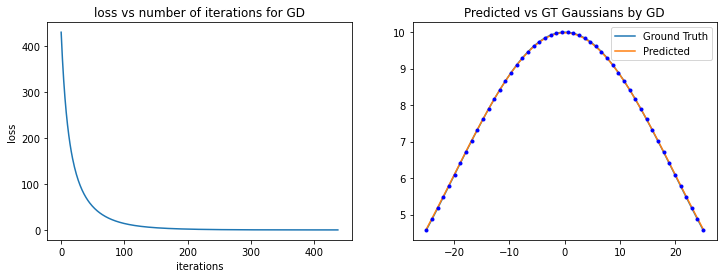

Convergence in Gauss Newton achieved at 3  iteration
a_est: 9.998337196905194  m_est: 0.002102935591206556  s_est: 20.00402659090192


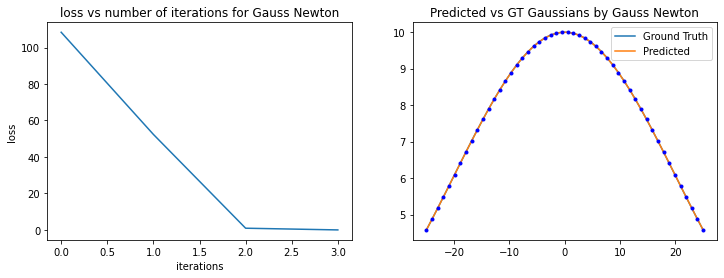

Convergence in LM achieved at 2  iteration
a_est: 10.254077061575403  m_est: -1.0498505979479578  s_est: 18.798688886556167


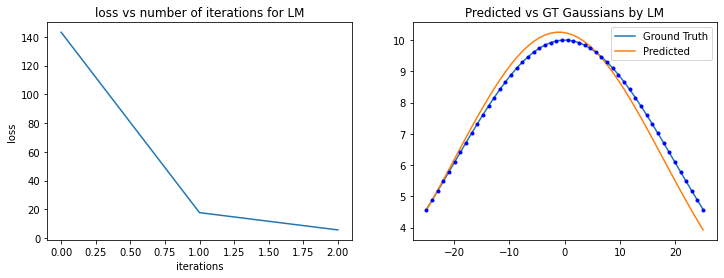

In [3]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #
# Tester code -- EVERYTHING IN ONE CELL

numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
a_est = 10
m_est = 13
s_est = 19.12
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
calculatedPrameters = np.array([a_est, m_est, s_est])

gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
LM(xObserved,yObserved,calculatedPrameters,10,1e+1)



##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?

for a_est: 20.0  m_est: 13.0  s_est: 19.2
Convergence in gradient descent achieved at 401  iteration
a_est: 9.983914372250908  m_est: 0.0006691704240702463  s_est: 20.08957755979924


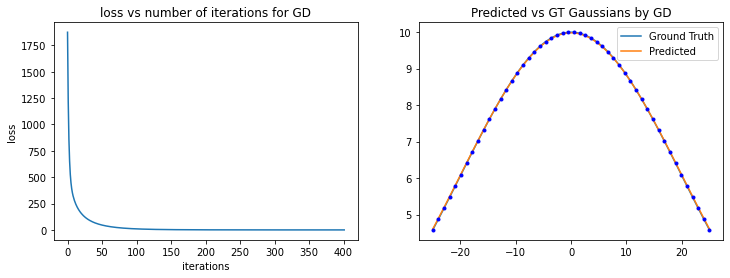

Convergence in Gauss Newton achieved at 3  iteration
a_est: 9.997568405154453  m_est: -0.007860524973484884  s_est: 20.003165014529056


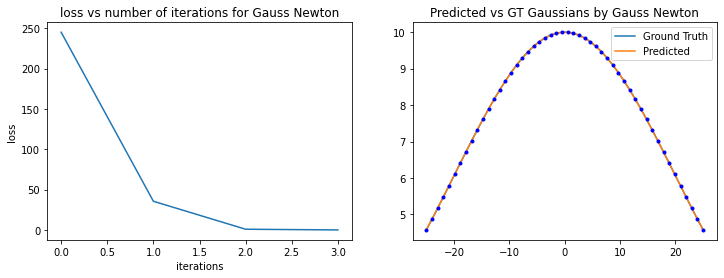

for a_est: 15.0  m_est: 15.0  s_est: 30.0
Convergence in Gauss Newton achieved at 2  iteration
a_est: 9.984687614860787  m_est: -0.0008925681619234016  s_est: 20.031617130516278


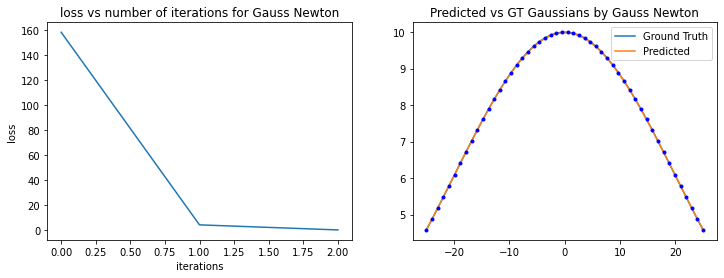

for a_est: 0.0  m_est: 5.0  s_est: 30.0
Convergence in Gauss Newton achieved at 4  iteration
a_est: 9.999896348612031  m_est: -0.0009580232171931269  s_est: 19.998668017574058


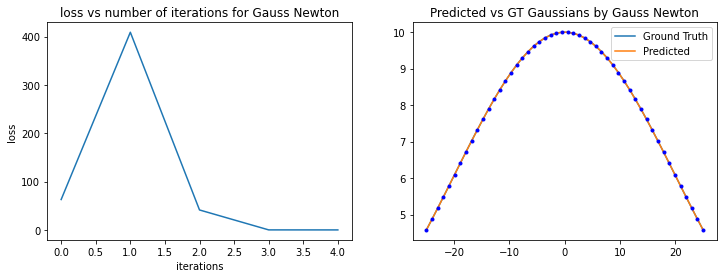

for a_est: 10.0  m_est: 5.0  s_est: 45.0
Convergence in Gauss Newton achieved at 4  iteration
a_est: 9.999949564582622  m_est: -0.000549485613638781  s_est: -19.99918552898828


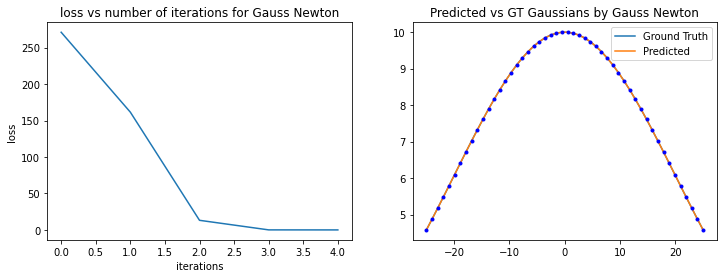

In [4]:
numberOfObservations = 50
xObserved = np.linspace(-25, 25, numberOfObservations)
a_gt = 10
m_gt = 0
s_gt = 20
yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
ests = np.array([[20,13,19.2],[15,15,30],[0,5,30],[10,5,45]])
for calculatedPrameters in ests:
    print("for a_est:",calculatedPrameters[0]," m_est:",calculatedPrameters[1], " s_est:",calculatedPrameters[2])
    gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    LM(xObserved,yObserved,calculatedPrameters,10,1e+1)


Observation: gauss newton is able to handle really far off estimates well, Gradient descent too handles to some extent. But LM is not able to handle

Different number of observations: Can a particular algorithm handle very less observations?

for 3 observations
Convergence in Gauss Newton achieved at 3  iteration
a_est: 9.998244588638427  m_est: -0.0036187727889811505  s_est: -19.98710431578631


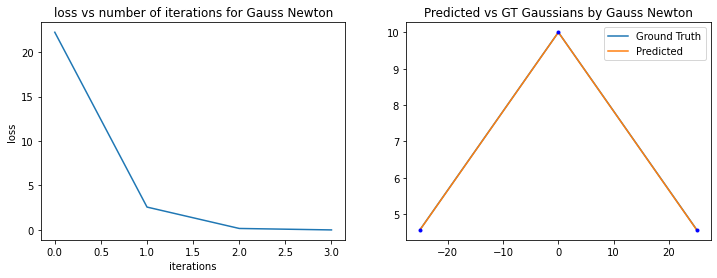

Convergence in LM achieved at 3  iteration
a_est: 7.912261994938874  m_est: -0.5284501715846743  s_est: 28.89854552453879


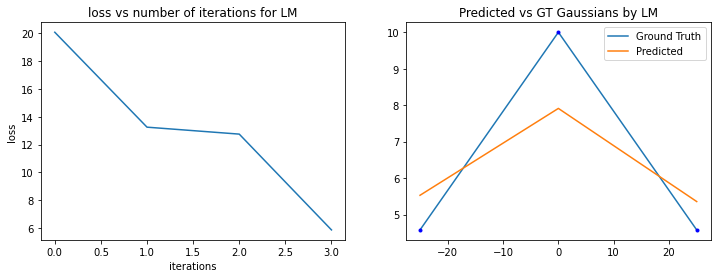

for 5 observations
Convergence in Gauss Newton achieved at 3  iteration
a_est: 9.982448276627636  m_est: 0.03373519885723952  s_est: -19.892406162819146


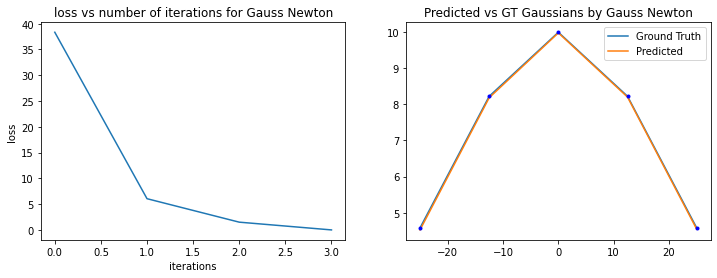

Convergence in LM achieved at 3  iteration
a_est: 8.315350470432676  m_est: -1.4110666938617307  s_est: 25.4091574580058


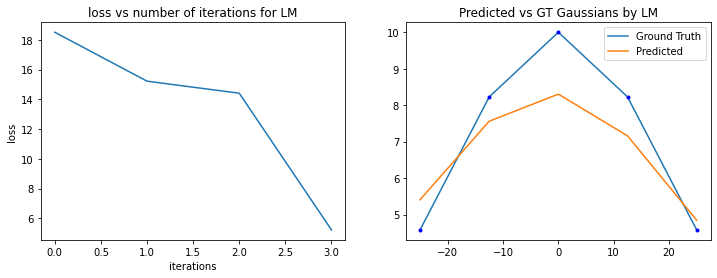

for 8 observations
Convergence in Gauss Newton achieved at 3  iteration
a_est: 9.988577199087958  m_est: -0.030128415358789074  s_est: -19.89809957757157


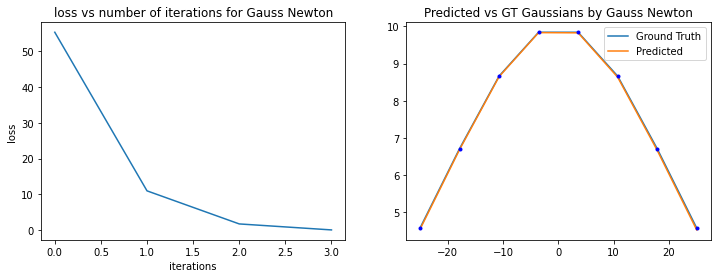

for 10 observations
Convergence in Gauss Newton achieved at 3  iteration
a_est: 9.985447214572805  m_est: -0.05710307896642841  s_est: -19.93203448923023


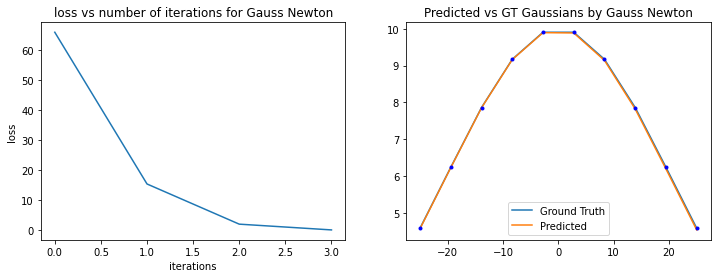

Convergence in LM achieved at 34  iteration
a_est: 10.148694738654903  m_est: 1.6299933236885857  s_est: 24.564089268726534


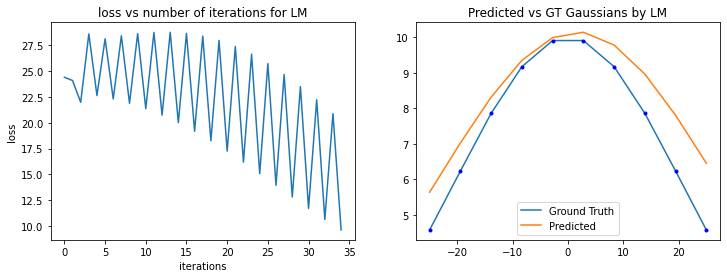

for 12 observations
Convergence in Gauss Newton achieved at 3  iteration
a_est: 9.98075694969458  m_est: -0.06882382598615511  s_est: -19.966465184641056


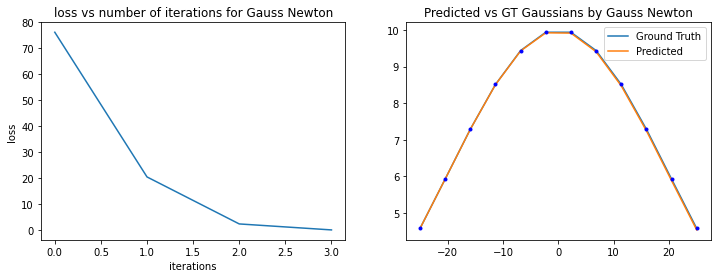

Convergence in LM achieved at 18  iteration
a_est: 9.830295820931154  m_est: 1.148283748311746  s_est: 25.362710491137953


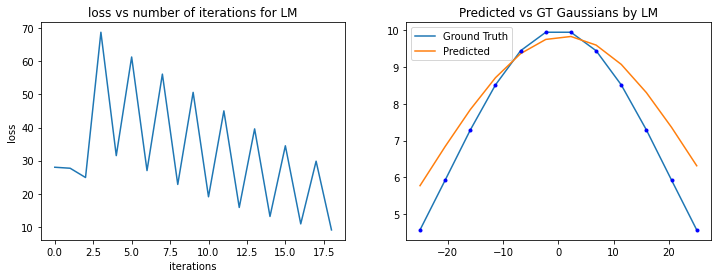

for 15 observations
Convergence in Gauss Newton achieved at 3  iteration
a_est: 9.974072170598296  m_est: -0.06938762605330862  s_est: -20.008381454161505


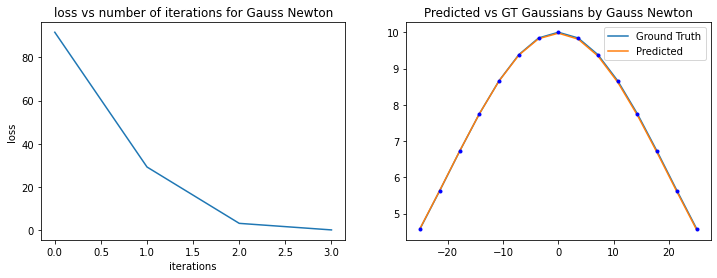

Convergence in LM achieved at 12  iteration
a_est: 9.112304672452595  m_est: 0.6918892259159876  s_est: 26.43441807026739


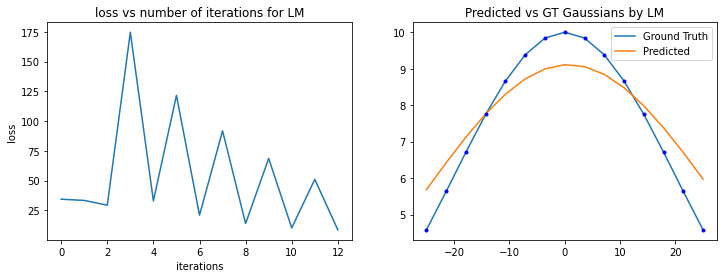

for 20 observations
Convergence in Gauss Newton achieved at 4  iteration
a_est: 9.999961027966563  m_est: 0.00033668476813428216  s_est: -19.99976952720658


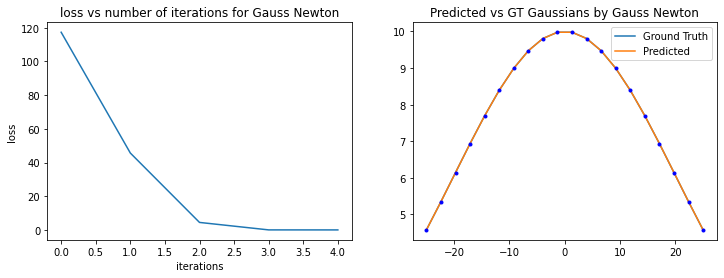

In [5]:
numberOfObservations = np.array([3,5,8,10,12,15,20])
a_gt = 10
m_gt = 0
s_gt = 50
for o in numberOfObservations:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)
    print("for", o,"observations")
    gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    LM(xObserved,yObserved,calculatedPrameters,10,1e+1)

Add noise to your observations: Can a particular algorithm handle large noise?

for * 0.0001  noise
Convergence in Gauss Newton achieved at 4  iteration
a_est: 9.999719859764724  m_est: 0.0002252682442002371  s_est: -20.000496925487226


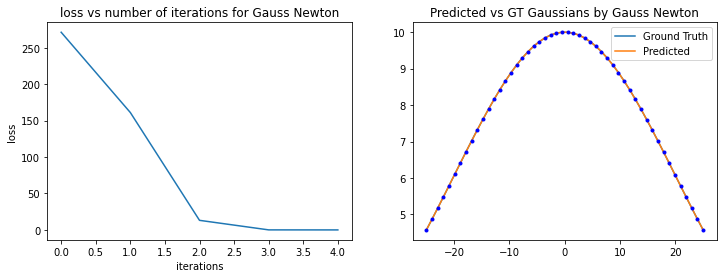

for * 0.0002  noise
Convergence in Gauss Newton achieved at 4  iteration
a_est: 10.00067291704943  m_est: -0.0010962126804061612  s_est: -19.994420937946078


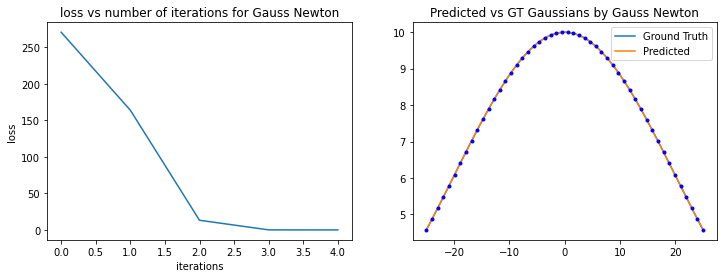

for * 0.001  noise
Convergence in Gauss Newton achieved at 4  iteration
a_est: 10.003603287201797  m_est: 0.0007687087428726869  s_est: -19.999222734198902


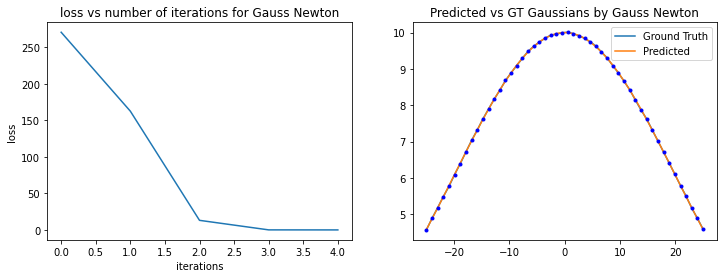

for * 0.002  noise
for * 0.01  noise


In [6]:
noise_arr = [1/10000,1/5000,1/1000,1/500,1/100]
o = 50
for n in noise_arr:
    xObserved = np.linspace(-25, 25, o)
    a_gt = 10
    m_gt = 0
    s_gt = 20
    yObserved = gaussian(xObserved, a_gt, m_gt, s_gt)+np.random.normal(0,a_gt*n,o)
    print("for *", n," noise")
    gradDescent(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    gaussNewton(xObserved,yObserved,calculatedPrameters,0.01,1e-2)
    LM(xObserved,yObserved,calculatedPrameters,10,1e+1)
    

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
Explain your experimentations with justification here

| This          | is            | sample  |table   |
| ------------- |:-------------:| -------:|-------:|
| sample 1      | sample 1      | sample 1|sample 1|

### Answer for 1.2
Explain your experimentations with justification here

| This          | is            | sample  |table   |
| ------------- |:-------------:| -------:|-------:|
| sample 2      | sample 2      | sample 2|sample 2|



# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [7]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2

In [8]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code
def rms(X,P):
    return np.sqrt(np.sum(np.square(X-P))/X.shape[1])
def centroid(arr):
    return np.mean(arr, axis=1)
    #return (1/arr.shape[0])*np.sum(X)
# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()
# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5 #Experiment & check if your theoretical understanding is correct.
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        # TODO2.1: what's current error?
        rmse = rms(X,P)
        # TODO2.2: call visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        # TODO2.3: Implement ICP to get R, t
        #Compute the centroids of each point cloud
        ux = centroid(X)
        ux = ux.reshape(ux.shape[0],1)
        up = centroid(P)
        up = up.reshape(up.shape[0],1)
        #Compute a matrix capturing the spread of the two point clouds
        w = (1/X.shape[1])*np.dot((X.astype(np.float)- ux),(P.astype(np.float)- up).T)
        #Use the singular value decomposition of the matrix to get the optimal rotation
        u, s, v_t = np.linalg.svd(w, full_matrices=True)
#         d = np.linalg.det(u)*np.linalg.det(v_t)  
#         R = np.array([[1,0],[0,d]])
        R = u @ v_t
        #Use the optimal rotation to get the optimal translation by aligning the centroids
        t = (ux - R@up)
        t = t.reshape(t.shape[0],1)
        P = np.dot(R,P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

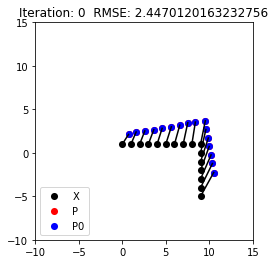

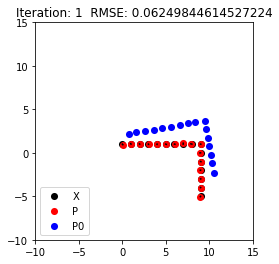

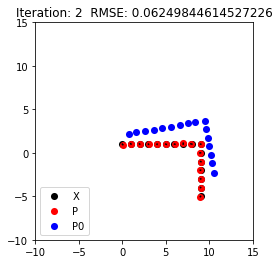

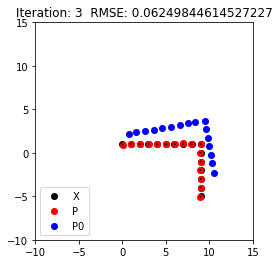

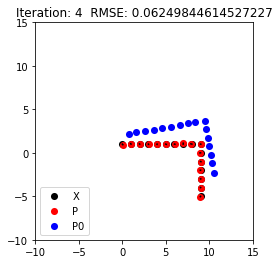

In [9]:
# Call ICP on P1 & P2
ICP(X,P1) 



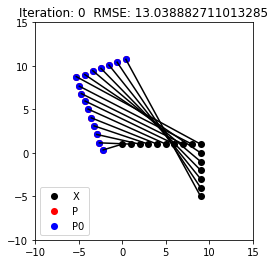

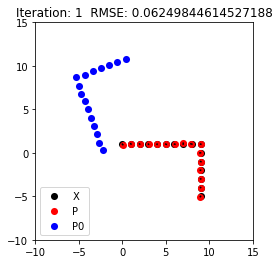

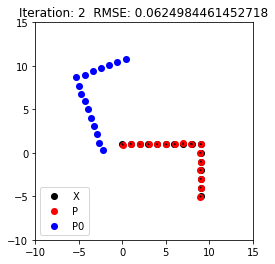

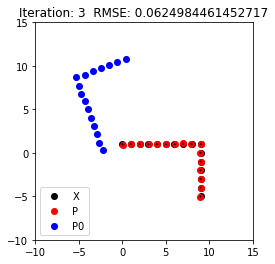

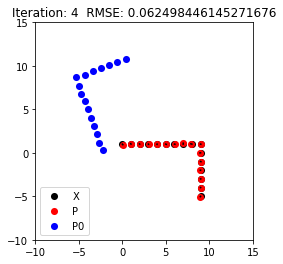

In [ ]:
ICP(X,P2) 